In [1]:
# Load packages 
import pandas as pd
# Load functions from another created python file created 
from Zipfunction import load_data, jon, num_marker, var_maker, scorr, real_plot

# Loading Data

In [3]:
soup = load_data('https://en.wikipedia.org/wiki/Zipf%27s_law')
sec_soup = load_data('https://plus.maths.org/content/mystery-zipf')
rd_soup = load_data('http://www.cut-the-knot.org/do_you_know/zipfLaw.shtml')
# Getting the most frequency words from each website
df = jon('Wikipedia', var_maker(soup), 'Maths', var_maker(sec_soup), 'Cut', var_maker(rd_soup)).iloc[1:, :]
df.head()

,Wikipedia,Maths,Cut
1,Zipf's,In,With
2,law,our,the
3,"(/zɪf/,",recent,view
4,German:,Plus,to
5,[ts͡ɪpf]),article,the


In [4]:
# Using the function to create a dataset from the rank of the most used in each website
tp1, zip1 = num_marker(var_maker(soup))
tp2, zip2 = num_marker(var_maker(sec_soup))
tp3, zip3 =  num_marker(var_maker(rd_soup))
tempdf = pd.DataFrame()
new_df = jon('Wikipedia Words', tp1.keys(),'Wikipedia Count', tp1.values(), 'Wikipedia Ex Count', zip1,
            'Maths Words', tp2.keys(), 'Maths Count', tp2.values(), 'Maths Ex Count', zip2,
            'Cut Words', tp3.keys(), 'Cut Count', tp3.values(), 'Cut Ex Count', zip3)
new_df.head()

,Wikipedia Words,Wikipedia Count,Wikipedia Ex Count,Maths Words,Maths Count,Maths Ex Count,Cut Words,Cut Count,Cut Ex Count
0,the,141.0,141.00,the,49.0,49.000000,the,169,169.000000
1,of,90.0,70.50,of,39.0,24.500000,of,124,84.500000
2,in,44.0,47.00,in,29.0,16.333333,a,77,56.333333
3,to,41.0,35.25,is,27.0,12.250000,in,64,42.250000
4,is,38.0,28.20,and,23.0,9.800000,to,60,33.800000


# Answer interesting questions:
Now you get to explore this exciting dataset! Can't think of where to start? Try your hand at these questions:
- Do these articles about Zipf's law follow zipf law?
- If they follow Zipf's law which of the three follows it the best?

## Exploratory Data Analysis (EDA)
The dataset is not huge, we can easily get to know it and decide how to tackle some interesting questions. From the introductory code above we know:

In [5]:
#Checking the length of each website
new_df.sum()

C:\Users\jasai\AppData\Local\Temp\ipykernel_10472\1412048153.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.sum()


Wikipedia Count                                                  2018.0
Wikipedia Ex Count                                          1037.596542
Maths Count                                                      1036.0
Maths Ex Count                                               333.043762
Cut Words             theofaintoisandthatforwithasbyitonZipf'sTheare...
Cut Count                                                          2689
Cut Ex Count                                                1275.840697
dtype: object

In [6]:
# First of all, let's ensure there are no nulls:
new_df.isnull().sum()

Wikipedia Words       185
Wikipedia Count       185
Wikipedia Ex Count    185
Maths Words           564
Maths Count           564
Maths Ex Count        564
Cut Words               0
Cut Count               0
Cut Ex Count            0
dtype: int64

In [7]:
# Drop missing values and reduced the dataframe for more accuary data
reduceddf = new_df.dropna().iloc[:30]
reduceddf.describe()

,Wikipedia Count,Wikipedia Ex Count,Maths Count,Maths Ex Count,Cut Count,Cut Ex Count
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,24.933333,18.776440,13.633333,6.525146,30.566667,22.505094
std,27.484081,27.212140,10.587837,9.456701,36.594406,32.615969
min,8.000000,4.700000,5.000000,1.633333,10.000000,5.633333
25%,11.000000,6.200099,7.000000,2.154644,11.000000,7.431324
50%,15.500000,9.106250,9.000000,3.164583,15.500000,10.914583
75%,24.750000,17.135417,17.000000,5.954861,32.500000,20.538194
max,141.000000,141.000000,49.000000,49.000000,169.000000,169.000000


In [8]:
# Finding the correlation of the expected value and the real values
corrs = scorr(reduceddf, 'Wikipedia Count', 'Wikipedia Ex Count','Maths Count', 'Maths Ex Count', 'Cut Count', 'Cut Ex Count')
corrs[0].head()

,Wikipedia Count,Wikipedia Ex Count
Wikipedia Count,1.000000,0.996992
Wikipedia Ex Count,0.996992,1.000000


In [9]:
corrs[1].head()

,Maths Count,Maths Ex Count
Maths Count,1.000000,0.995764
Maths Ex Count,0.995764,1.000000


In [10]:
corrs[2].head()

,Cut Count,Cut Ex Count
Cut Count,1.000000,0.994982
Cut Ex Count,0.994982,1.000000


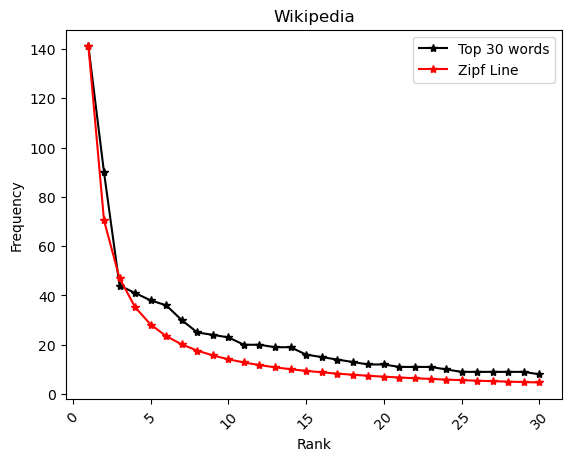

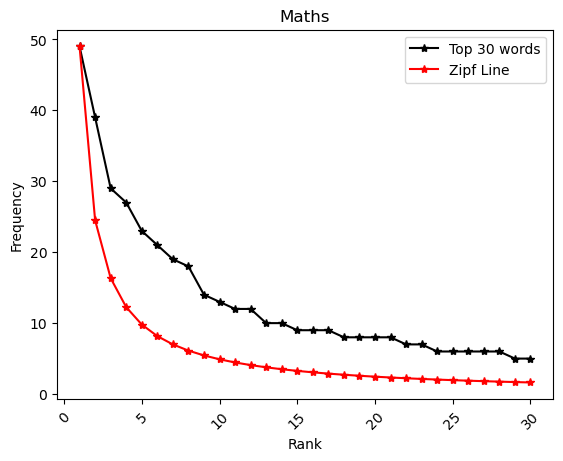

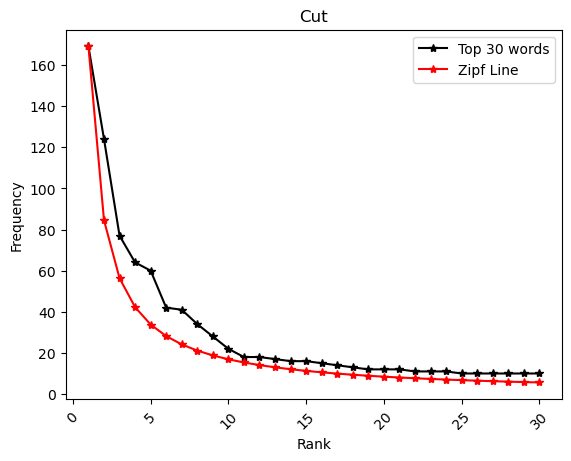

In [11]:
# Making a plot
real_plot(reduceddf, 'Wikipedia Count', 'Wikipedia Ex Count','Maths Count', 'Maths Ex Count', 'Cut Count', 'Cut Ex Count')